# Lab 1: Directional Reflectance

Emma Marshall <br>
Lab group: Eric Goodwin, Kylie Rees, Emma Marshall


In [41]:
import pandas as pd
import math
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import scipy as sp
from scipy.stats import linregress
from statsmodels.graphics.regressionplots import abline_plot


## Reading in data

Following cells construct table 1 from lab worksheet:

In [2]:
view_zeniths_source30 = [-75, -60, -45, -30,-15, 0 , 15, 30, 45, 60, 75]

In [18]:
sand_source30 = pd.DataFrame({'view_zenith': view_zeniths_source30, 
                              'voltage':[0.044, 0.137, 0.164, 0.176, 0.180, 0.185, 0.192, np.nan, 0.186, 0.154, 0.098],
                              'material':['sand' for s in range(len(view_zeniths_source30))]})

In [19]:
gravel_source30 = pd.DataFrame({'view_zenith': view_zeniths_source30,
                                 'voltage':[0.103, 0.159, 0.207, 0.245, 0.254, 0.273, 0.294, np.nan, 0.294, 0.295, 0.162],
                                 'material':['gravel' for g in range(len(view_zeniths_source30))]})

In [20]:
rocks_source30 = pd.DataFrame({'view_zenith':view_zeniths_source30,
                               'voltage': [0.050, 0.081, 0.107, 0.123, 0.135, 0.148, 0.164, np.nan, 0.169, 0.142, 0.095],
                               'material': ['rocks' for r in range(len(view_zeniths_source30))]})

In [21]:
water_source30 = pd.DataFrame({'view_zenith': view_zeniths_source30, 
                               'voltage': [0.019, 0.017, 0.061, 0.312, 0.097, 0.008, 0.006, np.nan,0.007, 0.007, 0.01],
                               'material':['water' for w in range(len(view_zeniths_source30))]})

In [22]:
source_30 = pd.concat([sand_source30, gravel_source30, rocks_source30, water_source30])
source_30['radians'] = source_30.apply(lambda row: math.radians(row.view_zenith), axis=1)
source_30.head()

,view_zenith,voltage,material,radians
0,-75,0.044,sand,-1.308997
1,-60,0.137,sand,-1.047198
2,-45,0.164,sand,-0.785398
3,-30,0.176,sand,-0.523599
4,-15,0.180,sand,-0.261799


In [23]:
source_30.loc[source_30['material'] == 'sand']

,view_zenith,voltage,material,radians
0,-75,0.044,sand,-1.308997
1,-60,0.137,sand,-1.047198
2,-45,0.164,sand,-0.785398
3,-30,0.176,sand,-0.523599
4,-15,0.180,sand,-0.261799
5,0,0.185,sand,0.000000
6,15,0.192,sand,0.261799
7,30,NaN,sand,0.523599
8,45,0.186,sand,0.785398
9,60,0.154,sand,1.047198


Following cells construct table 2 from lab worksheet:

In [24]:
view_zeniths_source45 = [-75, -60, -45, -30, -15, 0, 15, 30, np.nan, 60, 75]


In [25]:
sand_source45 = pd.DataFrame({'view_zenith':view_zeniths_source45,
                              'voltage':[0.094, 0.129, 0.142, 0.148, 0.150, 0.153, 0.157, 0.170, np.nan,0.146, 0.094],
                              'material':['sand' for s in range(len(view_zeniths_source45))]})

In [26]:
gravel_source45 = pd.DataFrame({'view_zenith':view_zeniths_source45,
                                'voltage':[0.093, 0.134, 0.165, 0.185, 0.2, 0.216, 0.232, 0.256, np.nan,0.296, 0.165],
                                'material':['gravel' for g in range(len(view_zeniths_source45))]})

In [27]:
rocks_source45 = pd.DataFrame({'view_zenith':view_zeniths_source45,
                               'voltage':[0.048, 0.07, 0.083, 0.092, 0.099, 0.11, 0.125, 0.147, np.nan, 0.147, 0.099],
                               'material':['rocks' for r in range(len(view_zeniths_source45))]})

In [28]:
water_source45 = pd.DataFrame({'view_zenith':view_zeniths_source45, 
                               'voltage': [0.041, 0.044, 0.411, 0.066, 0.006, 0.005, 0.004, 0.005, np.nan, 0.006, 0.010],
                               'material':['water' for w in range(len(view_zeniths_source45))]})

In [29]:
source_45 = pd.concat([sand_source45, gravel_source45, rocks_source45, water_source45])
source_45['radians'] = source_45.apply(lambda row: math.radians(row.view_zenith), axis=1)
source_45.head()

,view_zenith,voltage,material,radians
0,-75.0,0.094,sand,-1.308997
1,-60.0,0.129,sand,-1.047198
2,-45.0,0.142,sand,-0.785398
3,-30.0,0.148,sand,-0.523599
4,-15.0,0.150,sand,-0.261799


In [61]:
def polar_plot_one_source_angle(df, source_zenith_angle):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection="polar")
    max_theta = 90
    min_theta = -90
    ax.set_thetamax(max_theta)
    ax.set_thetamin(min_theta)
    ax.set_theta_zero_location("N")
    ax.set_theta_direction(-1)
    ax.set_rlim(0,0.5)

    ax.plot(df.loc[df['material'] == 'sand']['radians'], df.loc[df['material'] == 'sand']['voltage'], marker='o', color='red', markersize=4, label = 'Sand', alpha = 0.6)
    ax.plot(df.loc[df['material'] == 'gravel']['radians'], df.loc[df['material'] == 'gravel']['voltage'], marker='o', color='purple', markersize=4, label = 'Gravel', alpha = 0.6)
    ax.plot(df.loc[df['material'] == 'rocks']['radians'], df.loc[df['material'] == 'rocks']['voltage'], marker='o', color='green', markersize=4, label = 'Rocks', alpha = 0.6)
    ax.plot(df.loc[df['material'] == 'water']['radians'], df.loc[df['material'] == 'water']['voltage'], marker='o', color='blue', markersize=4, label = 'Water', alpha = 0.6)

    ax.axvline(x=math.radians(source_zenith_angle), ymin = 0.0, ymax = 1.0, color='gold', label = 'light source')
    ax.axvline(x=math.radians(source_zenith_angle), ymin = 0.9, ymax = 1.0, linewidth = 10, color='gold')
    
    ax.set_title('Directional voltage of different materials across view zenith \n angles [-75, 75] with a fixed light source zenith angle of {} degrees'.format(source_zenith_angle),
                 y=0.9, loc = 'center')
    #position legend
    angle = math.radians(25)
    ax.legend(loc = 'upper right',
              bbox_to_anchor=(1. + np.cos(angle)/2, .5 + np.sin(angle)/2))

    plt.show()


## Question 1

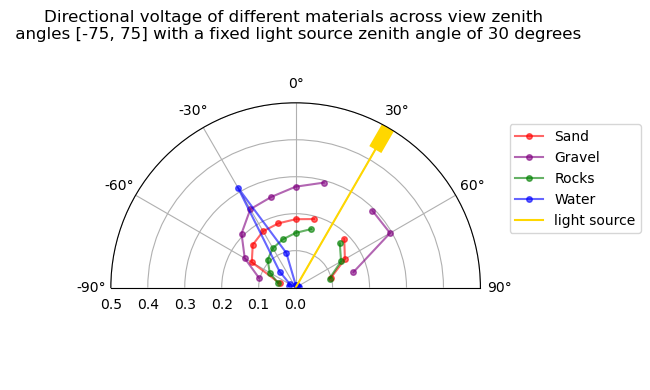

In [62]:
polar_plot_one_source_angle(source_30, 30)

## Question 2

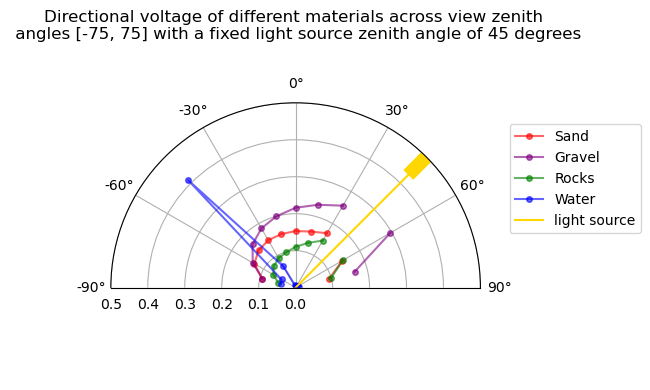

In [63]:
polar_plot_one_source_angle(source_45, 45)

## Question 3

I think that sand is the most isotropic reflectance surface. Caused by volume scattering within the sand depth that produces relatively random directional reflectance?

## Question 4 

Gravel best exemplifies backscattering BRDF because it is rough relative to wavelength, so more signal is reflected back toward the light source.

## Question 5

Water best exemplifies a specular BRDF because it is smooth relative to the wavelength of the signal. 

## Question 6

**Sand** - The voltage profiles for sand for both 30 and 45 degree light source zenith angles are very similar with slightly higher voltage at 30 degree source zenith than 45 degree source zenith angle. 

**Water** - water displays very specular reflection in both 30 degree and 45 degree light source zenith angle scenarios, with an increase in voltage observed when light source zenith angle is increased (V = 0.411 @ 45 degrees; V = 0.312 @ 30 degrees)

**Gravel** - Gravel displays a similar voltage pattern across view zenith angles in both source zenith angle scenarios, with higher voltages across nearly all view zenith angles when source zenith angle is 30 degrees relative to 45 degrees

**Rocks** - Slightly higher voltages across all view zenith angles when light source zenith angle is lower (30 degrees) relative to higher (45 degrees)

Overall, voltage appears to increase with a lower light source zenith angle. 



## Question 7

In [64]:
table3 = pd.DataFrame({'light_zenith':[-75, -60, -45, -30, -15, 0, 15, 30, 45, 60, 75],
                       'voltage':[0.052, 0.1, 0.142, 0.172, 0.2, np.nan, 0.202, 0.176, 0.147, 0.107, 0.061],
                       'material':['sand' for s in range(11)]})

In [65]:
table3['radians'] = table3.apply(lambda row: math.radians(row.light_zenith), axis=1)
table3

,light_zenith,voltage,material,radians
0,-75,0.052,sand,-1.308997
1,-60,0.100,sand,-1.047198
2,-45,0.142,sand,-0.785398
3,-30,0.172,sand,-0.523599
4,-15,0.200,sand,-0.261799
5,0,NaN,sand,0.000000
6,15,0.202,sand,0.261799
7,30,0.176,sand,0.523599
8,45,0.147,sand,0.785398
9,60,0.107,sand,1.047198


Text(0.5, 1.0, 'Reflectance from 0 degree view zenith when light source zenith changes')

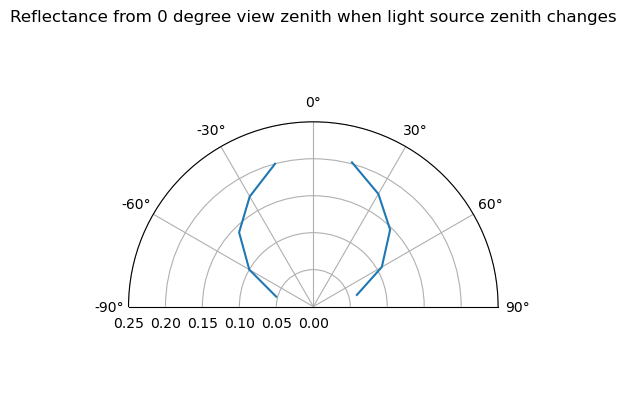

In [66]:
fig = plt.figure()
ax = fig.add_subplot(111, projection="polar")
max_theta = 90
min_theta = -90
ax.set_thetamax(max_theta)
ax.set_thetamin(min_theta)
ax.set_theta_zero_location("N")
ax.set_theta_direction(-1)
ax.set_rlim(0,0.25)

ax.plot(table3['radians'], table3['voltage']);
ax.set_title('Reflectance from 0 degree view zenith when light source zenith changes')

In [67]:
table3['cos_theta'] = table3.apply(lambda row: math.cos(row.radians), axis=1)

Drop light_zenith = 4 from df:

In [68]:
table3 = table3.drop(5)
table3

,light_zenith,voltage,material,radians,cos_theta
0,-75,0.052,sand,-1.308997,0.258819
1,-60,0.100,sand,-1.047198,0.500000
2,-45,0.142,sand,-0.785398,0.707107
3,-30,0.172,sand,-0.523599,0.866025
4,-15,0.200,sand,-0.261799,0.965926
6,15,0.202,sand,0.261799,0.965926
7,30,0.176,sand,0.523599,0.866025
8,45,0.147,sand,0.785398,0.707107
9,60,0.107,sand,1.047198,0.500000
10,75,0.061,sand,1.308997,0.258819


Defining independent (x) and dependent (y) vars for OLS:

In [69]:
y = table3['voltage']
x = table3['cos_theta']

In [70]:
model = sm.OLS(y, sm.add_constant(x))
results = model.fit()

In [71]:
results.params

const        0.003481
cos_theta    0.200763
dtype: float64

In [72]:
results.summary()

/home/emmamarshall/miniconda3/envs/optics/lib/python3.10/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                voltage   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     1496.
Date:                Mon, 26 Sep 2022   Prob (F-statistic):           2.20e-10
Time:                        11:03:50   Log-Likelihood:                 41.691
No. Observations:                  10   AIC:                            -79.38
Df Residuals:                       8   BIC:                            -78.78
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0035      0.004      0.948      0.371      -0.005       0.012
cos_theta      0.2008      0.005     38.673      0.000       0.189       0.213
==============================================================================
Omnibus:                        3.134   Durbin-Watson:                   0.880
Prob(Omnibus):                  0.209   Jarque-Bera (JB):                0.986
Skew:                           0.050   Prob(JB):                        0.611
Kurtosis:                       1.465   Cond. No.                         5.71
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

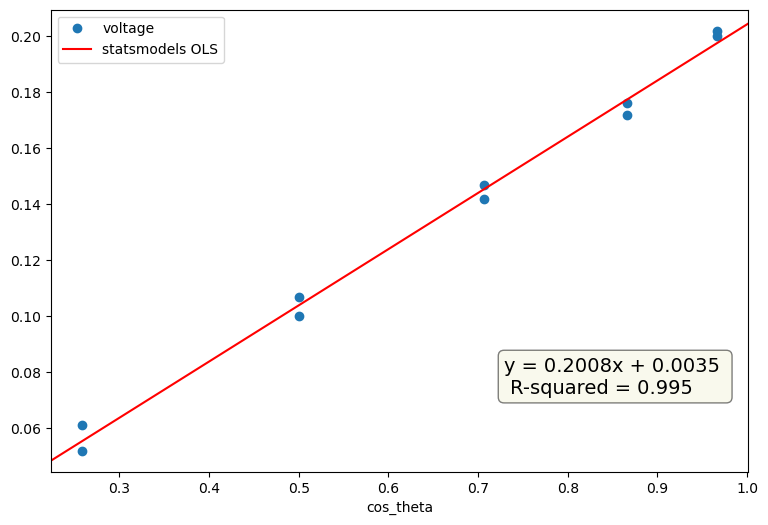

In [73]:
fig, ax = plt.subplots(figsize=(9,6))

#how to place text boxes: https://matplotlib.org/3.3.4/gallery/recipes/placing_text_boxes.html
text = 'y = 0.2008x + 0.0035 \n R-squared = 0.995'
props = dict(boxstyle='round', facecolor='beige', alpha=0.5)

table3.plot(x = 'cos_theta', y='voltage', linestyle='None', marker='o', ax=ax)
#sns.regplot(x = table3['cos_theta'], y = table3['voltage'], color='purple', label='seaborn linear regression model \n fit w/ci (purple shading)')
a = abline_plot(model_results = results, ax=ax, color= 'red', label='statsmodels OLS')
ax.text(0.65, 0.25, text, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)

ax.legend()

Cos(theta) is a good predictor of voltage when voltage is considered as a proxy for directional reflectance. 